# Dataset Overview

This dataset represents boston marathon results from 2014. Contains approximately 32000 observations across 21 columns.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import re

%matplotlib inline

# Read Data In

In [2]:
boston = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
boston.shape

(31984, 21)

In [4]:
boston.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
list(boston.columns)

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 'ctz',
 '35k',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 'city',
 '40k']

In [6]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [7]:
boston.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


# Exploratory Analysis

In [8]:
# # First remove '-' from all columns

def non_decimal(x):
    x = str(x)
    if x.find('-') != -1:
        return np.nan
    else:
        return float(x)

boston['5k'] = boston['5k'].apply(non_decimal)    
boston['10k'] = boston['10k'].apply(non_decimal)
boston['20k'] = boston['20k'].apply(non_decimal)
boston['25k'] = boston['25k'].apply(non_decimal)
boston['half'] = boston['half'].apply(non_decimal)
boston['30k'] = boston['30k'].apply(non_decimal)
boston['35k'] = boston['35k'].apply(non_decimal)
boston['40k'] = boston['40k'].apply(non_decimal)
boston['official'] = boston['official'].apply(non_decimal)

display(boston.head(5))

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


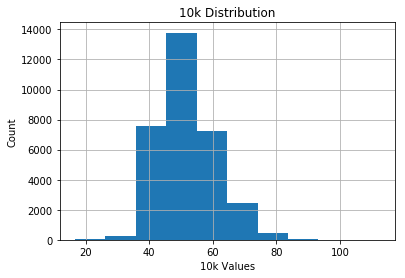

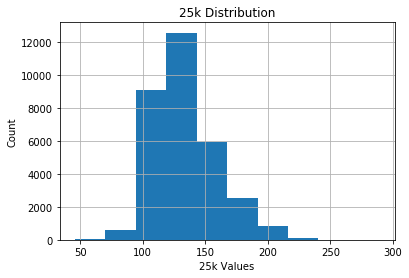

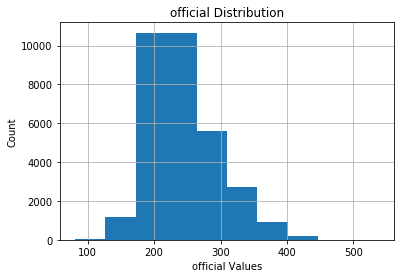

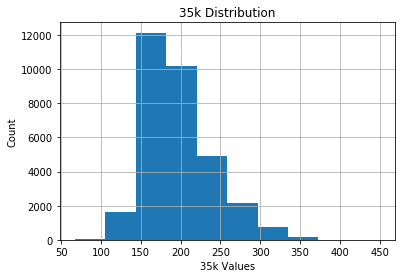

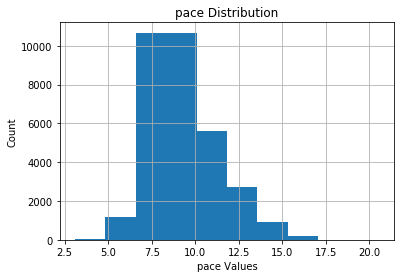

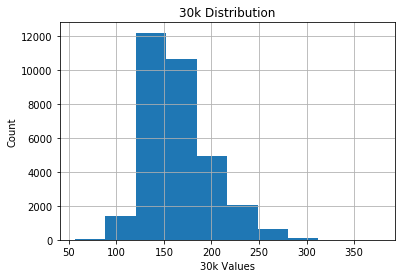

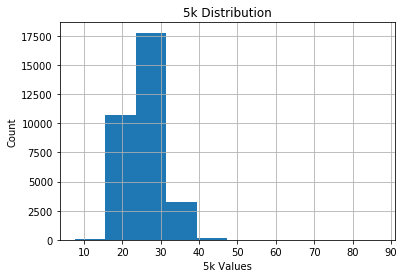

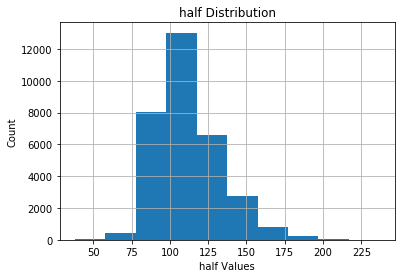

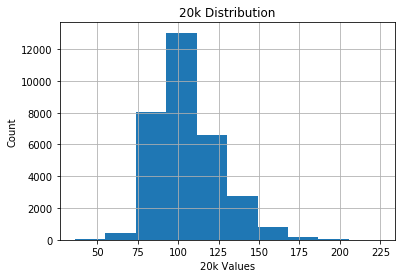

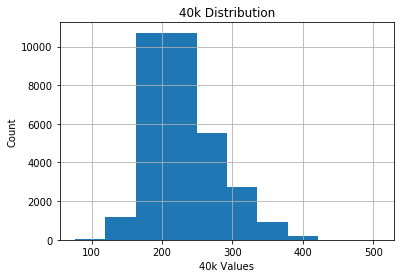

In [9]:
# Plot histograms for all continuous data
for col in boston.dtypes[boston.dtypes == 'float64'].index:
    boston[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

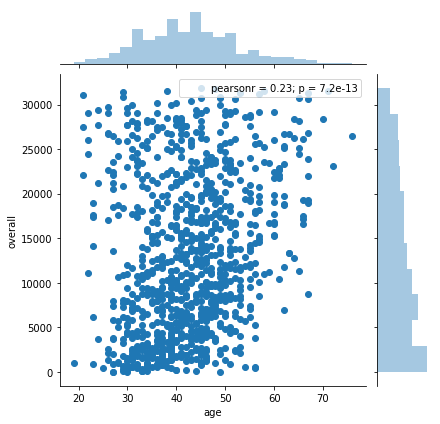

In [10]:
#Age vs. Overall

sns.jointplot(x="age", y="overall", data=boston.dropna())
plt.show()

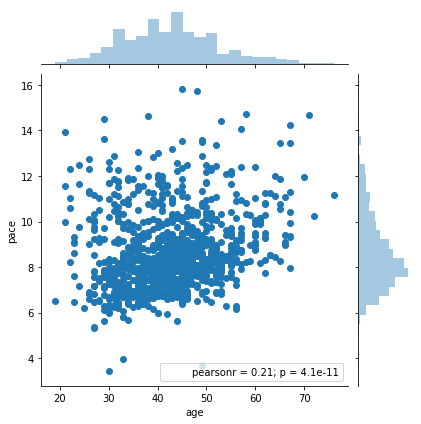

In [11]:
#Age/Gender vs. Pace

sns.jointplot(x="age", y="pace", data=boston.dropna())
plt.show()

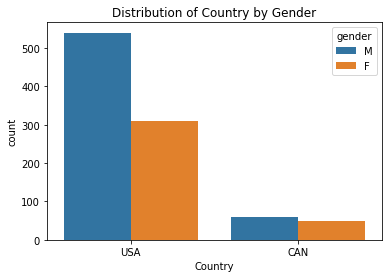

In [12]:
#Countplot of country with gender

sns.countplot(x='country', hue='gender', data=boston.dropna())
plt.title('Distribution of Country by Gender')
plt.xlabel('Country')
plt.show()

# Data Cleaning

In [13]:
#Determine missing values across dataframe

missing_values_count = boston.isnull().sum()
print(missing_values_count)

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64


In [14]:
categorical = boston.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique()) 

name
31915
gender
2
bib
31984
ctz
84
state
68
country
78
city
5934


In [15]:
#Remove columns with many unique values, for perfomance purposes - name, bib, ctz, city
#Drop features

boston = boston.drop(['name'], 1)
boston = boston.drop(['bib'], 1)
boston = boston.drop(['ctz'], 1)
boston = boston.drop(['city'], 1)
boston = boston.drop(['country'], 1)
boston = boston.drop(['state'], 1)
boston = boston.drop(['gender'], 1)

In [16]:
#Drop null values
boston = boston.dropna()

In [17]:
#Confirm no missing values
missing_values_count = boston.isnull().sum()
print(missing_values_count)

10k          0
division     0
25k          0
age          0
official     0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
40k          0
dtype: int64


# Use K Means to Estimate Clusters

In [18]:
#Establish X

saved_cols = boston.columns
X = normalize(boston)
X = pd.DataFrame(X)
X.columns = saved_cols

In [19]:
#Establish training set
X_train = X.copy()

In [20]:
#Confirm this worked
X_train.head(5)

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,0.099653,0.045897,0.273487,0.269643,0.489086,0.045897,0.409627,0.045897,0.018760,0.339520,0.046011,0.227877,0.216001,0.461433
1,0.115911,0.003558,0.293264,0.117405,0.494346,0.003558,0.414013,0.074712,0.018856,0.353389,0.057706,0.247155,0.234205,0.469976
2,0.101340,0.006098,0.279266,0.249998,0.491459,0.006098,0.411093,0.006098,0.018780,0.344204,0.047256,0.231888,0.220120,0.464020
3,0.115531,0.010641,0.292393,0.085132,0.498660,0.010641,0.412783,0.095773,0.019048,0.352340,0.057464,0.246421,0.233510,0.471595
4,0.103625,0.012106,0.280670,0.242114,0.491673,0.012106,0.410564,0.012106,0.018764,0.345194,0.048544,0.233640,0.221413,0.464374


In [21]:
# #Declare and fit the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

#Extract cluster assignments for each data point and add as a column in DataFrame
boston['kmeans_labels'] = kmeans.labels_

In [22]:
#Find size of each cluster
boston['kmeans_labels'].value_counts()

1    14251
0    14128
2     3270
Name: kmeans_labels, dtype: int64

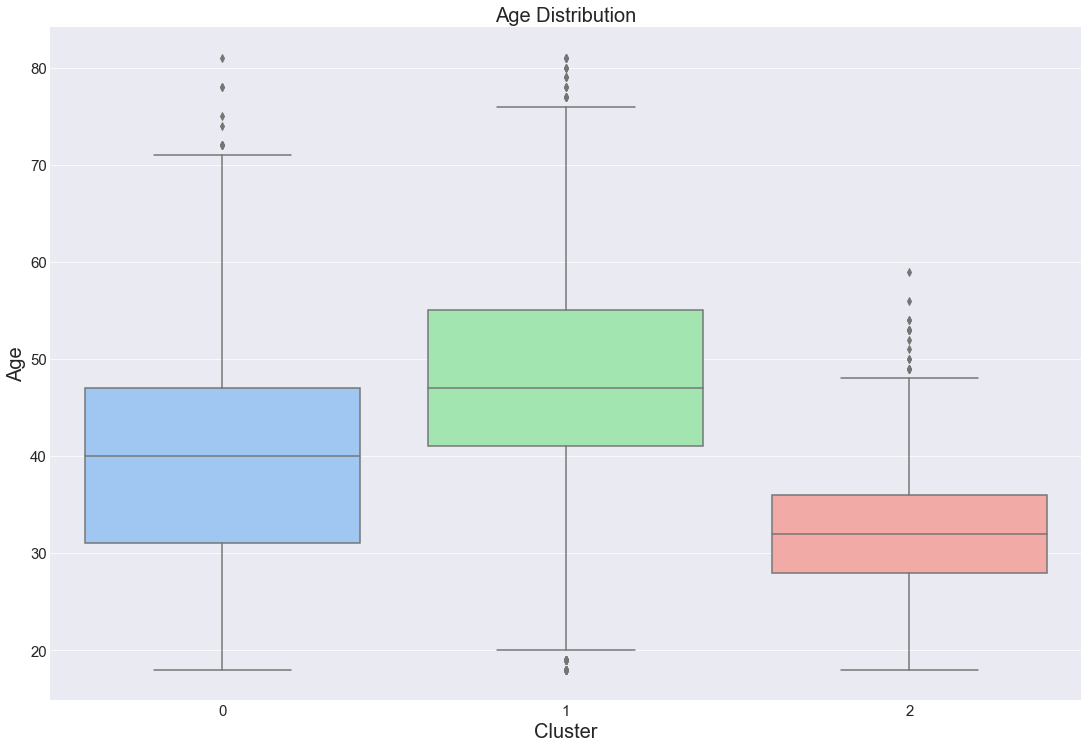

count    31649.000000
mean        42.385067
std         11.299795
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64




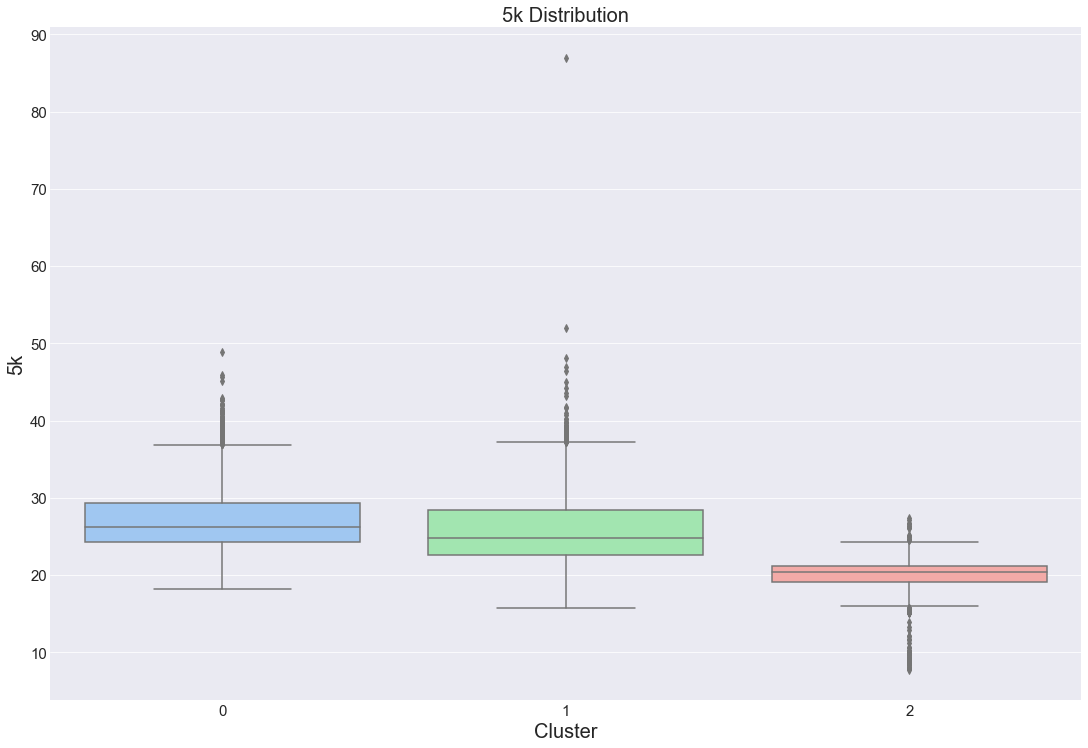

count    31649.000000
mean        25.678261
std          4.215381
min          7.750000
25%         22.620000
50%         25.050000
75%         28.400000
max         86.950000
Name: 5k, dtype: float64




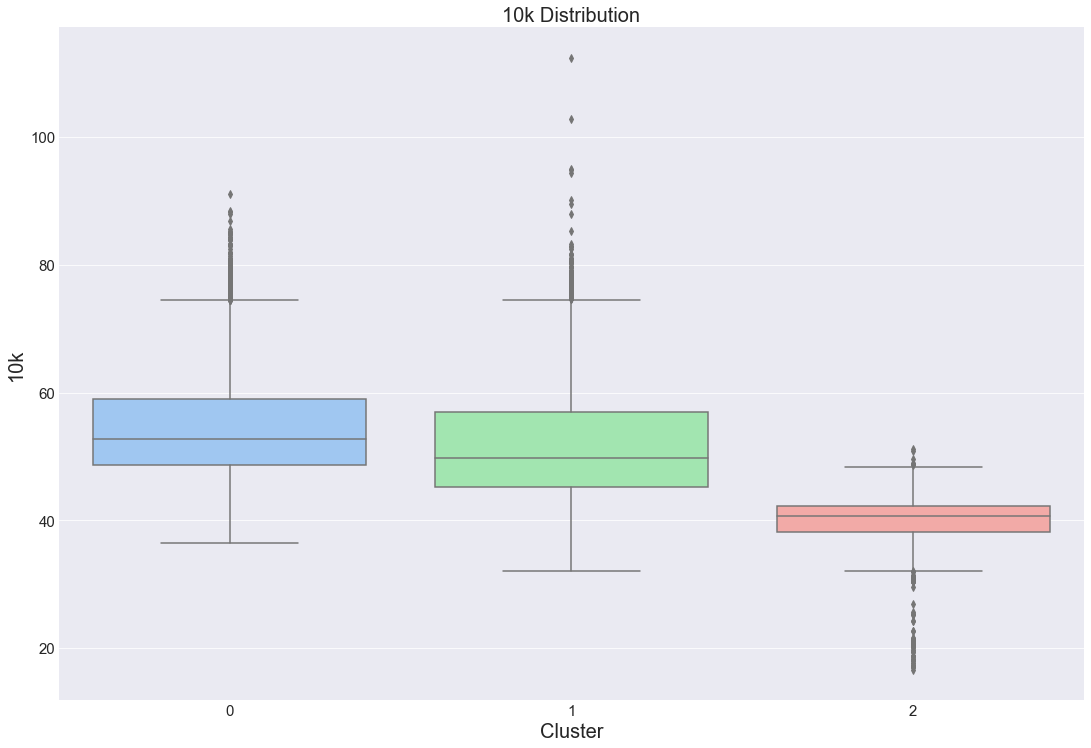

count    31649.000000
mean        51.629039
std          8.710102
min         16.620000
25%         45.370000
50%         50.280000
75%         57.000000
max        112.380000
Name: 10k, dtype: float64




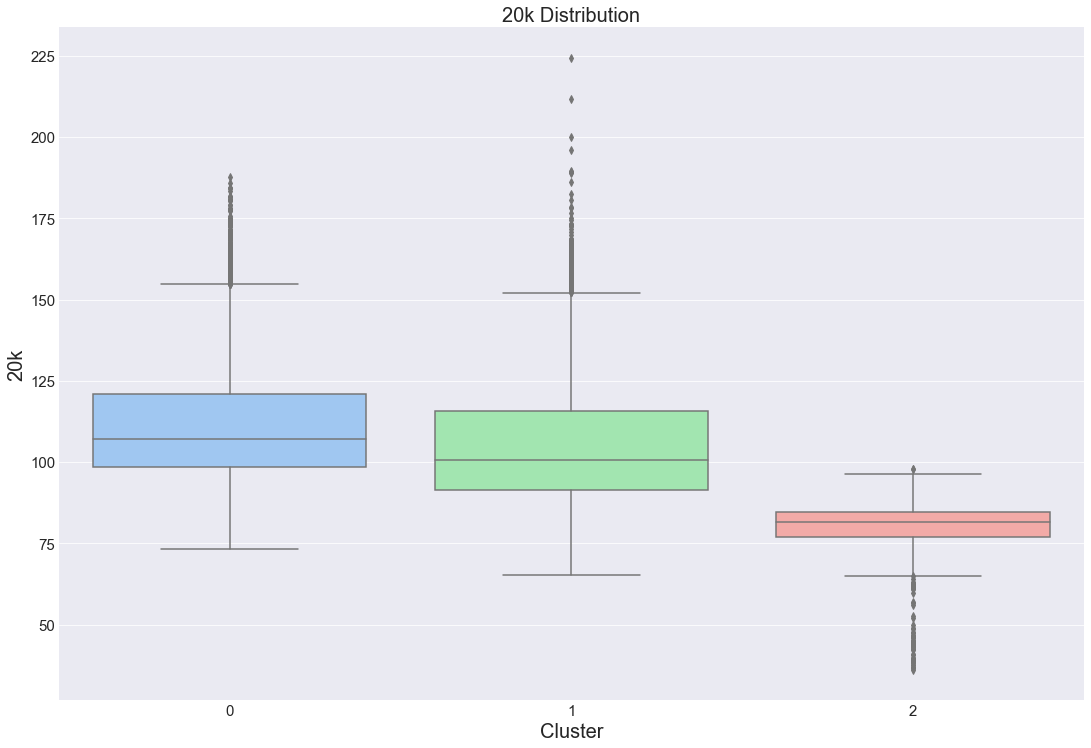

count    31649.000000
mean       105.321404
std         19.159500
min         36.100000
25%         91.670000
50%        102.000000
75%        116.150000
max        224.350000
Name: 20k, dtype: float64




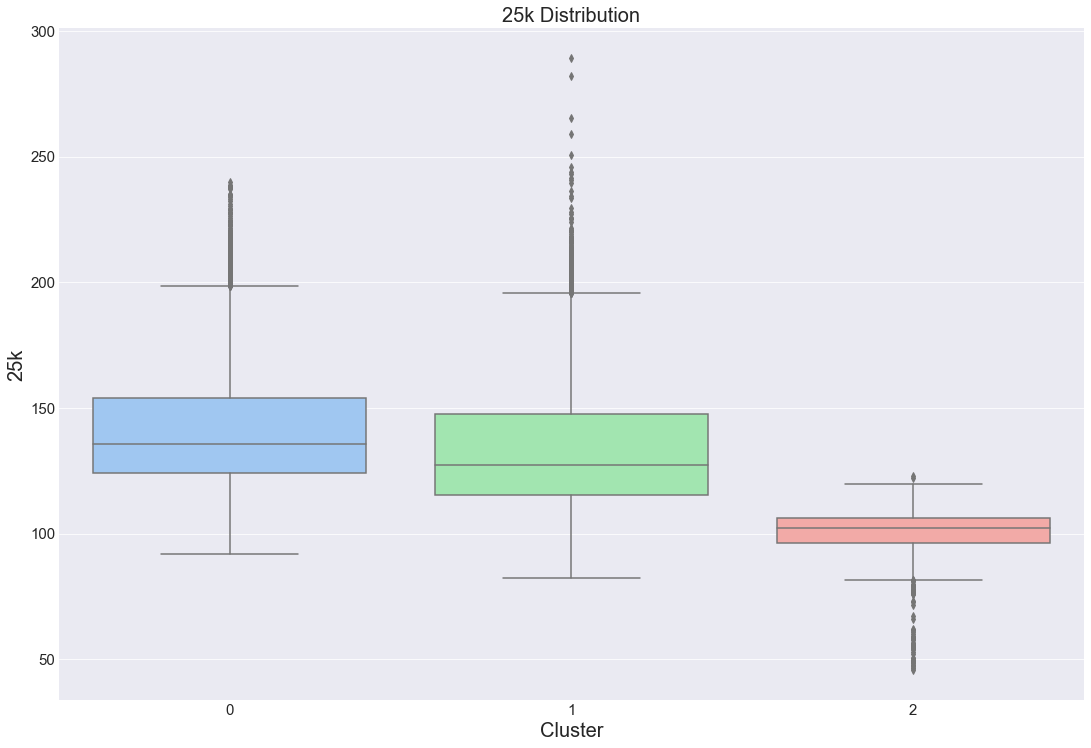

count    31649.000000
mean       133.581175
std         25.571480
min         45.800000
25%        115.430000
50%        128.850000
75%        147.700000
max        289.020000
Name: 25k, dtype: float64




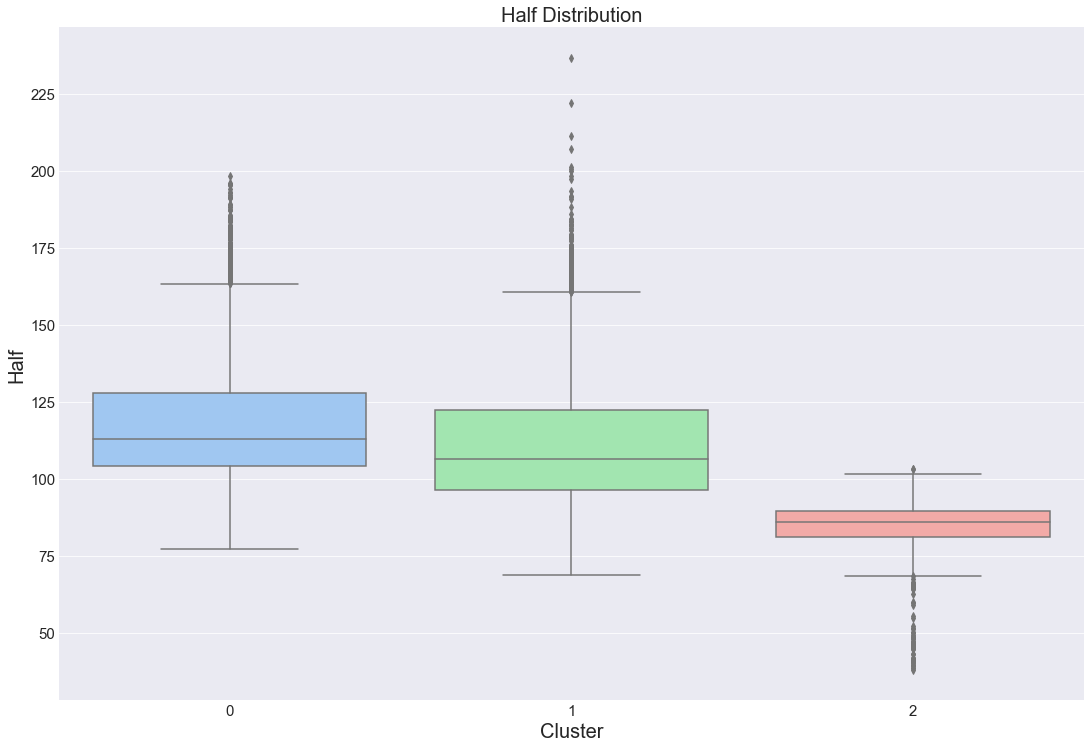

count    31649.000000
mean       111.211481
std         20.306387
min         38.030000
25%         96.750000
50%        107.680000
75%        122.680000
max        236.670000
Name: half, dtype: float64




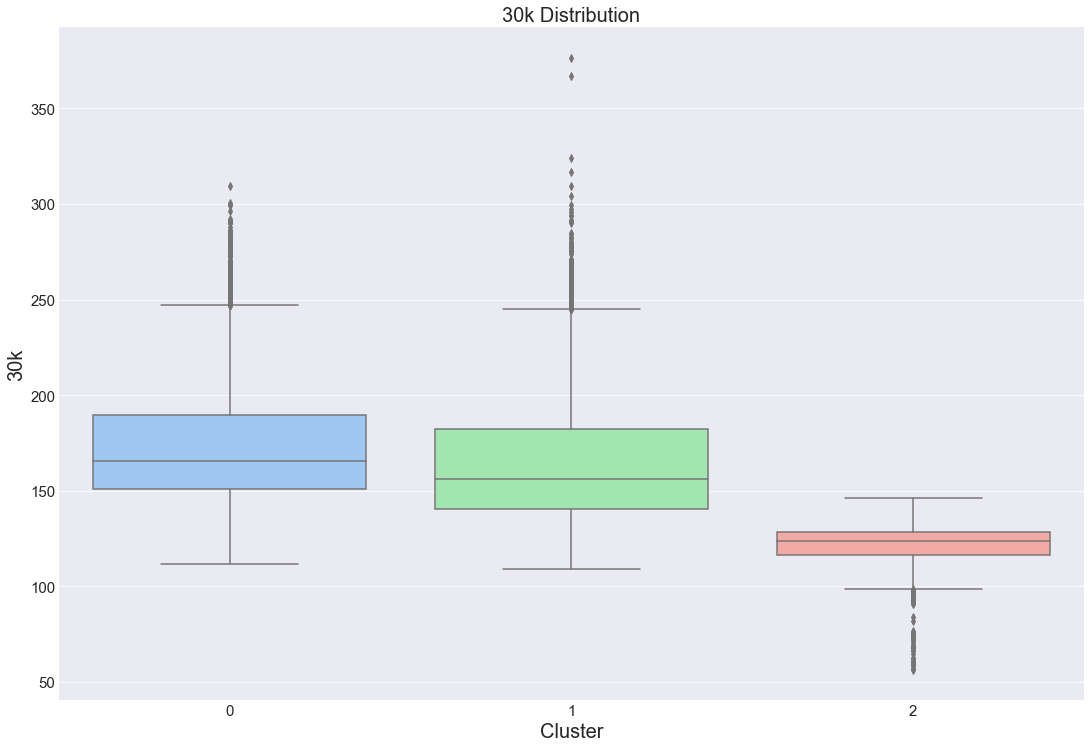

count    31649.000000
mean       163.894883
std         32.889354
min         56.450000
25%        140.520000
50%        157.500000
75%        182.200000
max        376.380000
Name: 30k, dtype: float64




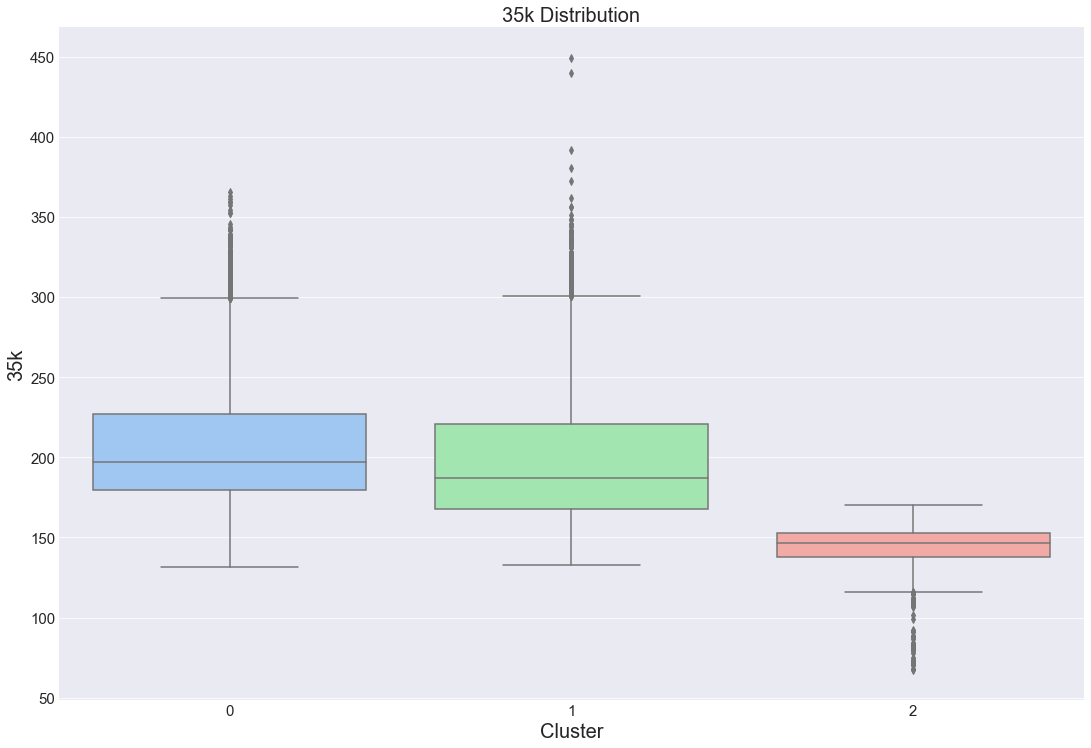

count    31649.000000
mean       196.033373
std         40.775036
min         67.420000
25%        166.950000
50%        187.850000
75%        219.370000
max        449.330000
Name: 35k, dtype: float64




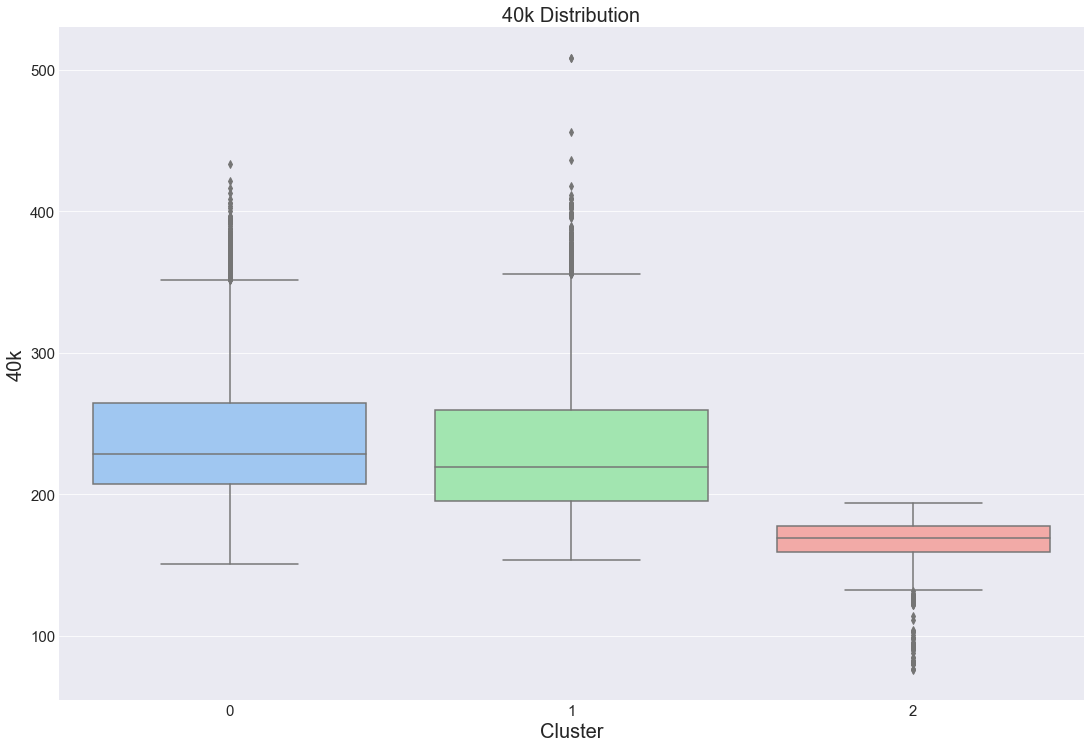

count    31649.000000
mean       228.189990
std         48.074493
min         76.100000
25%        193.620000
50%        218.470000
75%        256.570000
max        508.350000
Name: 40k, dtype: float64




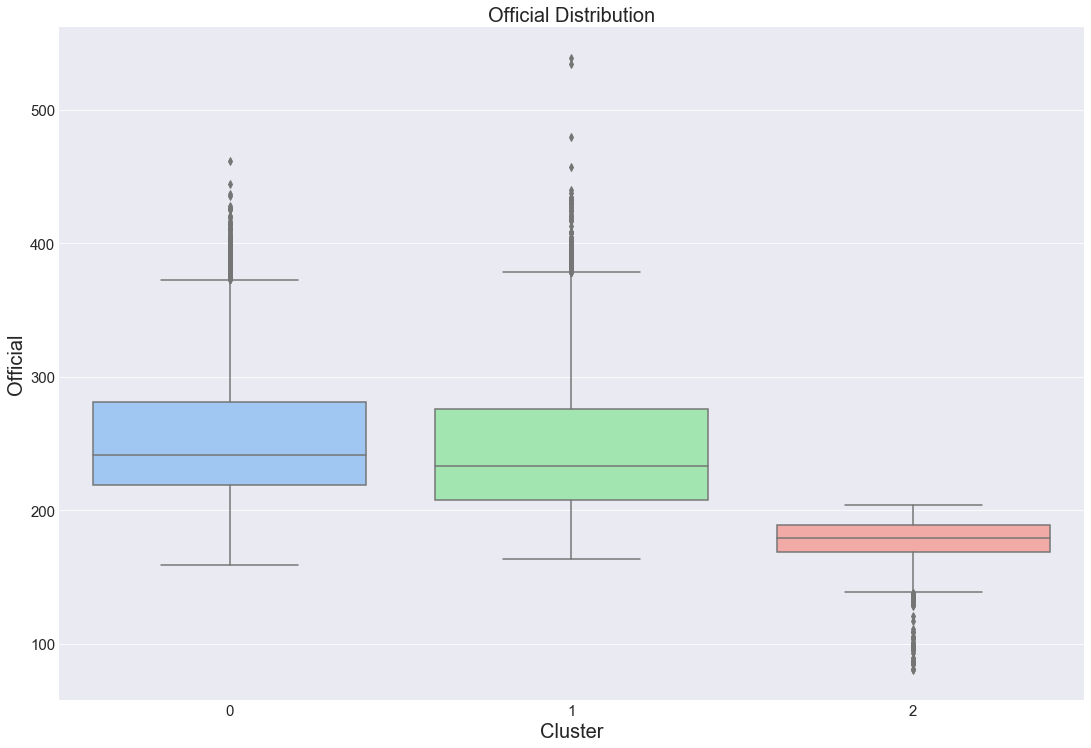

count    31649.000000
mean       241.952383
std         50.842552
min         80.600000
25%        205.300000
50%        231.980000
75%        272.200000
max        538.880000
Name: official, dtype: float64




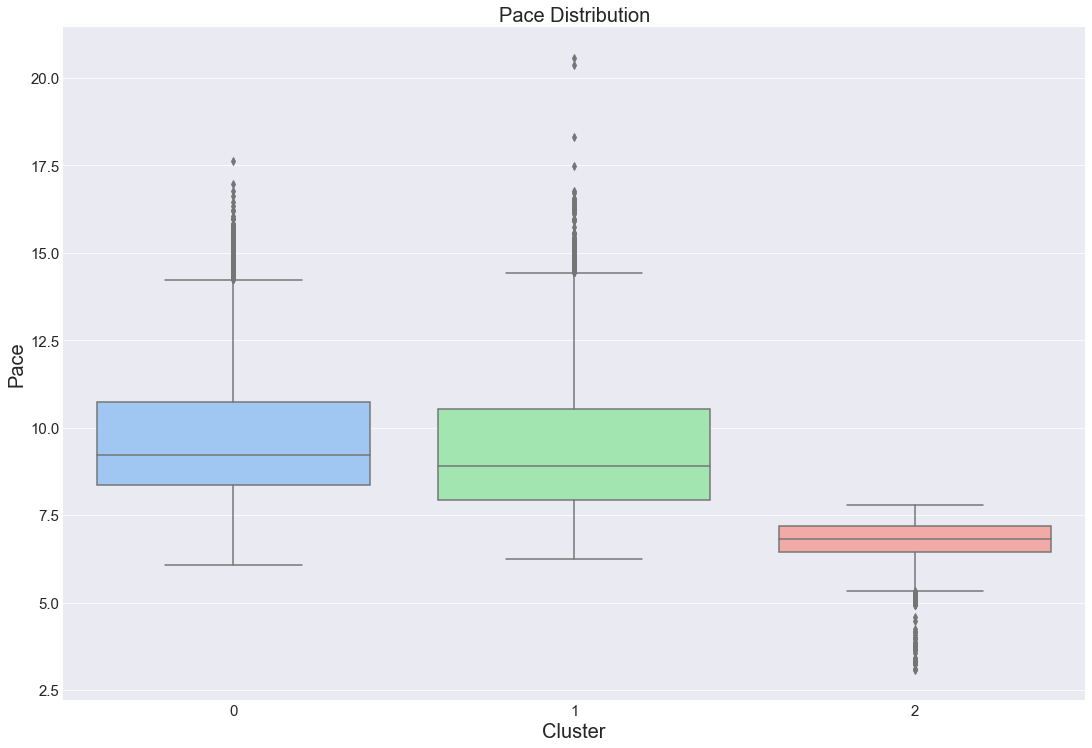

count    31649.000000
mean         9.236463
std          1.939150
min          3.080000
25%          7.830000
50%          8.850000
75%         10.380000
max         20.570000
Name: pace, dtype: float64




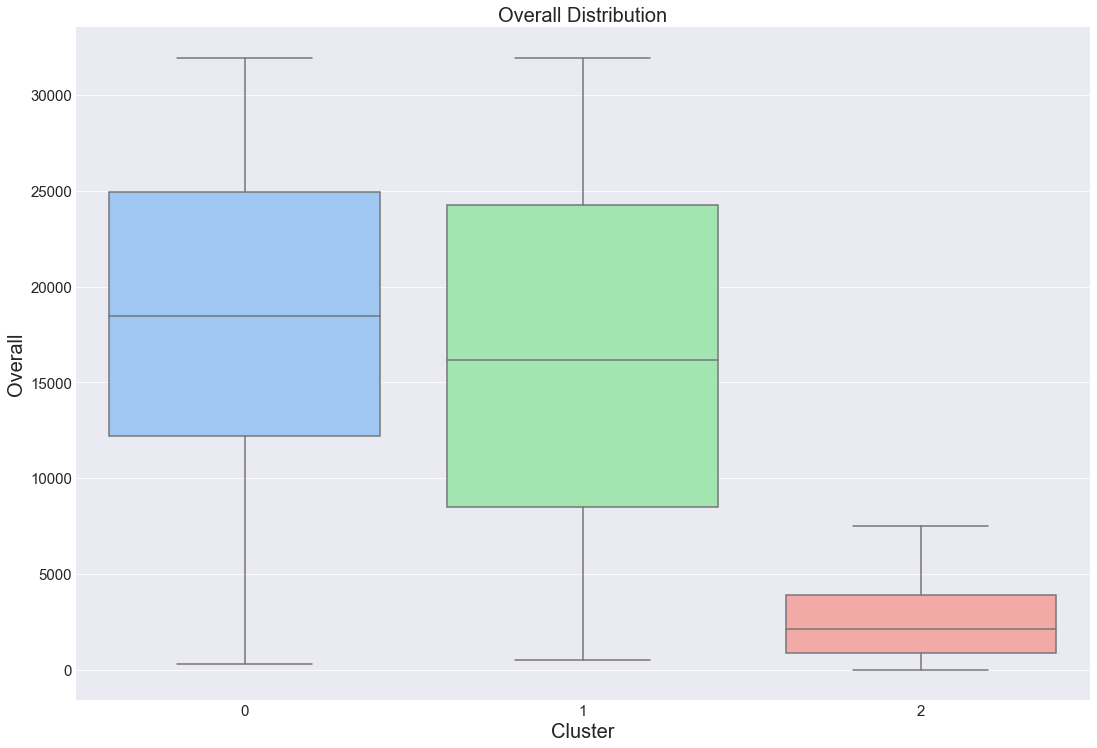

count    31649.000000
mean     15833.958924
std       9182.223743
min          1.000000
25%       7880.000000
50%      15829.000000
75%      23785.000000
max      31931.000000
Name: overall, dtype: float64




In [23]:
#Boxplots for each continuous feature and cluster

for col in boston[['age','5k', '10k', '20k', '25k', 'half', '30k', '35k', '40k', 'official', 'pace', 'overall']]:
    sns.set_style("darkgrid")
    sns.factorplot(kind='box', y=col, x='kmeans_labels', data=boston, size=10, aspect=1.5, palette='pastel')
    plt.xlabel('Cluster', fontsize=20)
    plt.ylabel(col.capitalize(), fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(col.capitalize() + ' Distribution', fontsize=20)
    plt.show()
    print(boston[col].describe())
    print('\n')

# Use Mean-Shift to Estimate Clusters

In [24]:
#Bandwidth function automatically derives a bandwidth number based on an inspection of 
#the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point and add to DataFrame
boston['mean_shift_labels'] = ms.labels_

# Count our clusters.
n_clusters_ = len(np.unique(ms.labels_))
print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


In [25]:
#Find size of each cluster
boston['mean_shift_labels'].value_counts()

0    27430
1     3748
2      268
3      203
Name: mean_shift_labels, dtype: int64

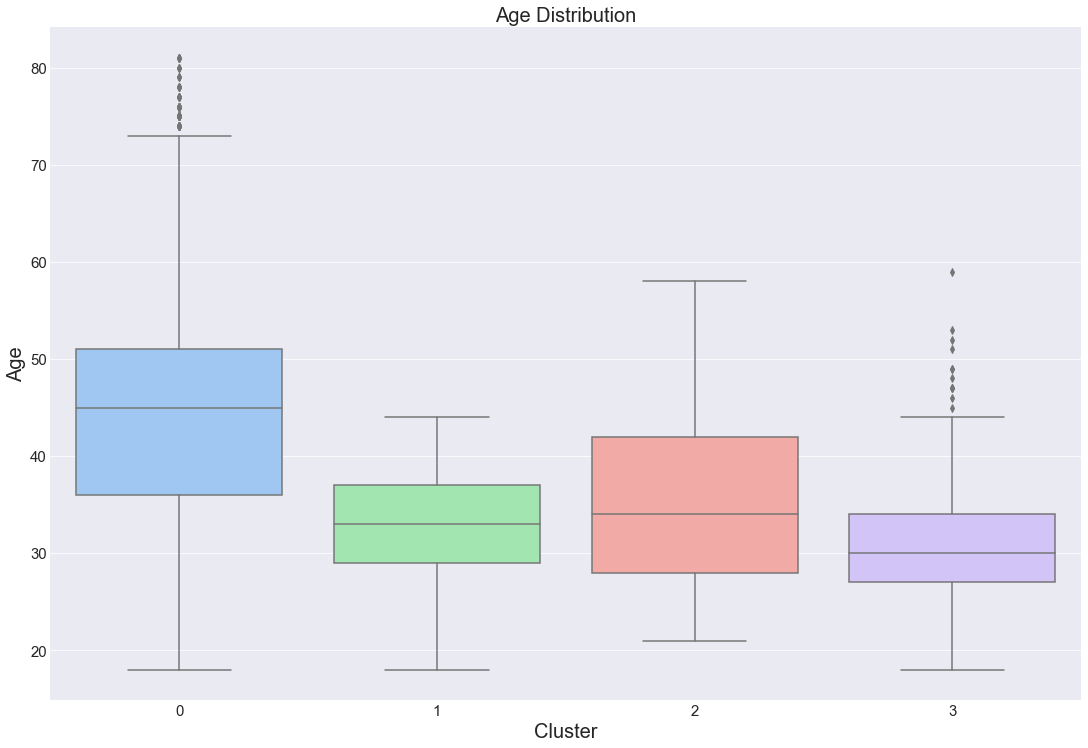

count    31649.000000
mean        42.385067
std         11.299795
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64




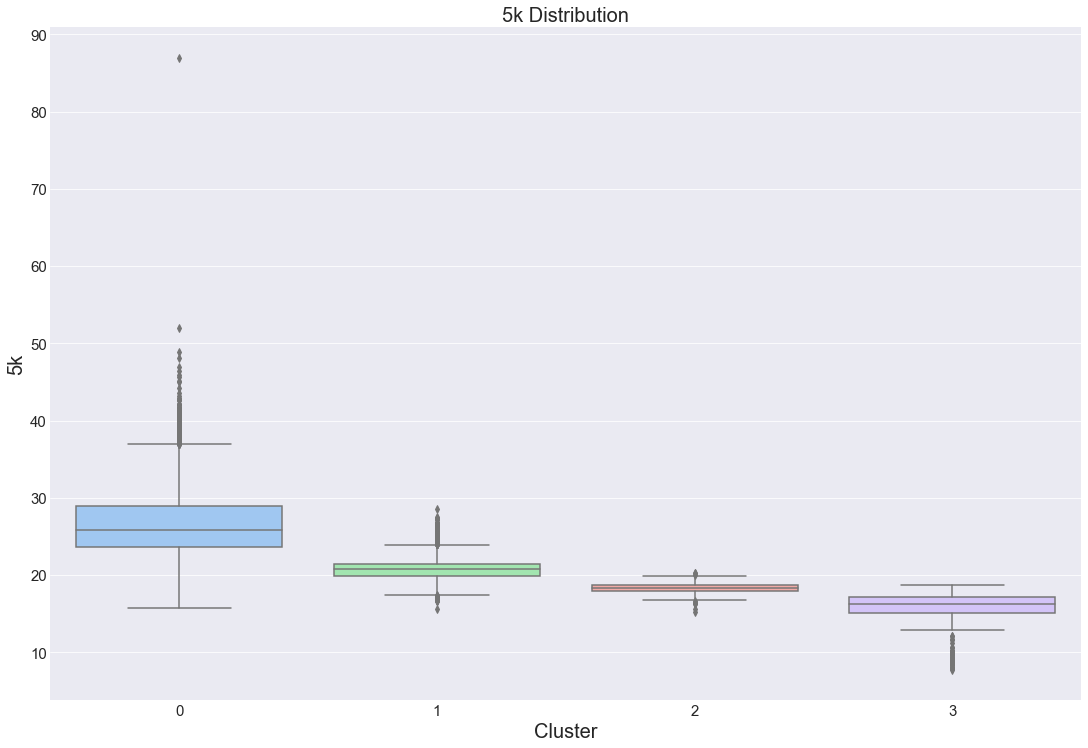

count    31649.000000
mean        25.678261
std          4.215381
min          7.750000
25%         22.620000
50%         25.050000
75%         28.400000
max         86.950000
Name: 5k, dtype: float64




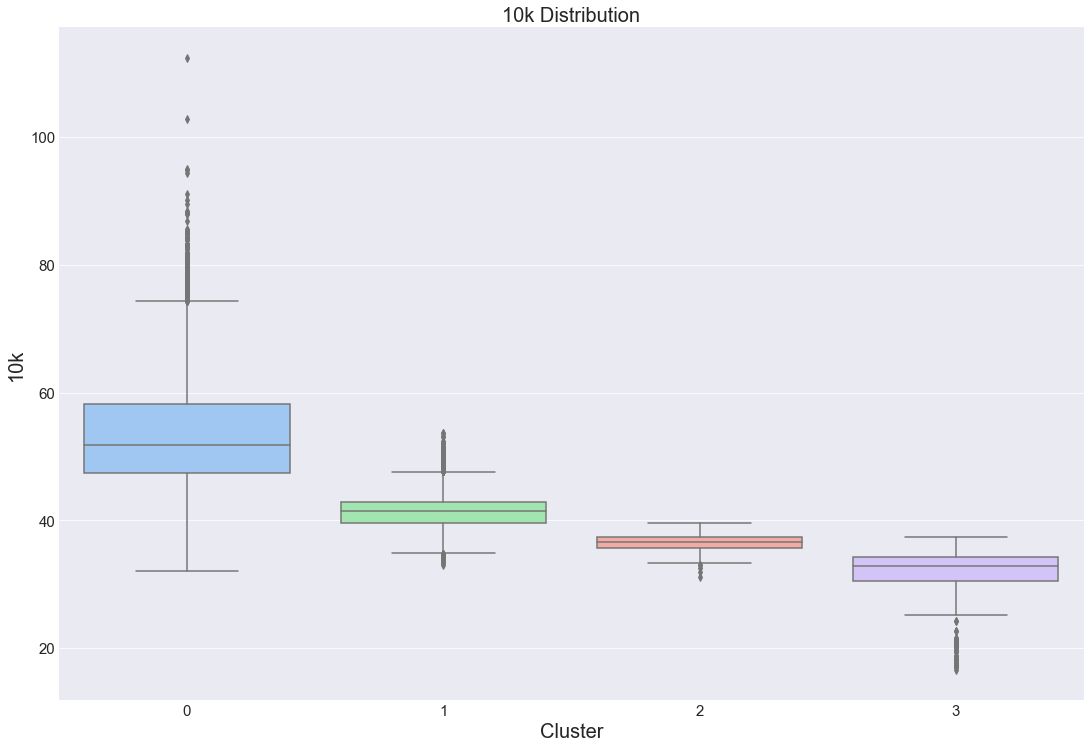

count    31649.000000
mean        51.629039
std          8.710102
min         16.620000
25%         45.370000
50%         50.280000
75%         57.000000
max        112.380000
Name: 10k, dtype: float64




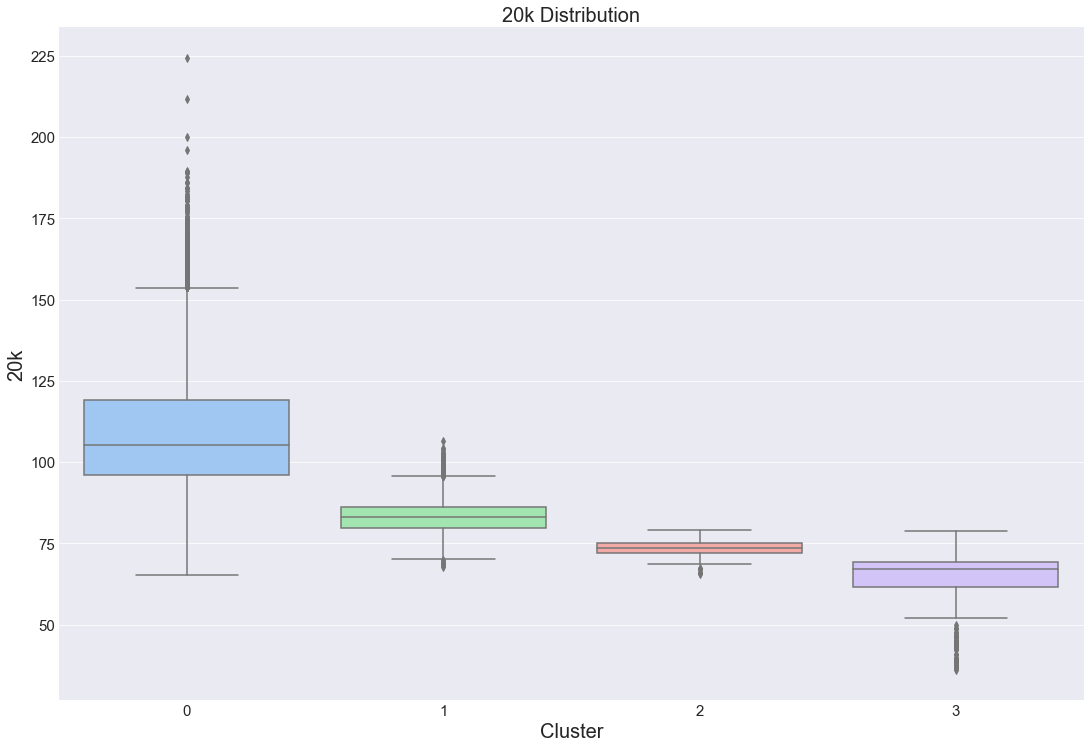

count    31649.000000
mean       105.321404
std         19.159500
min         36.100000
25%         91.670000
50%        102.000000
75%        116.150000
max        224.350000
Name: 20k, dtype: float64




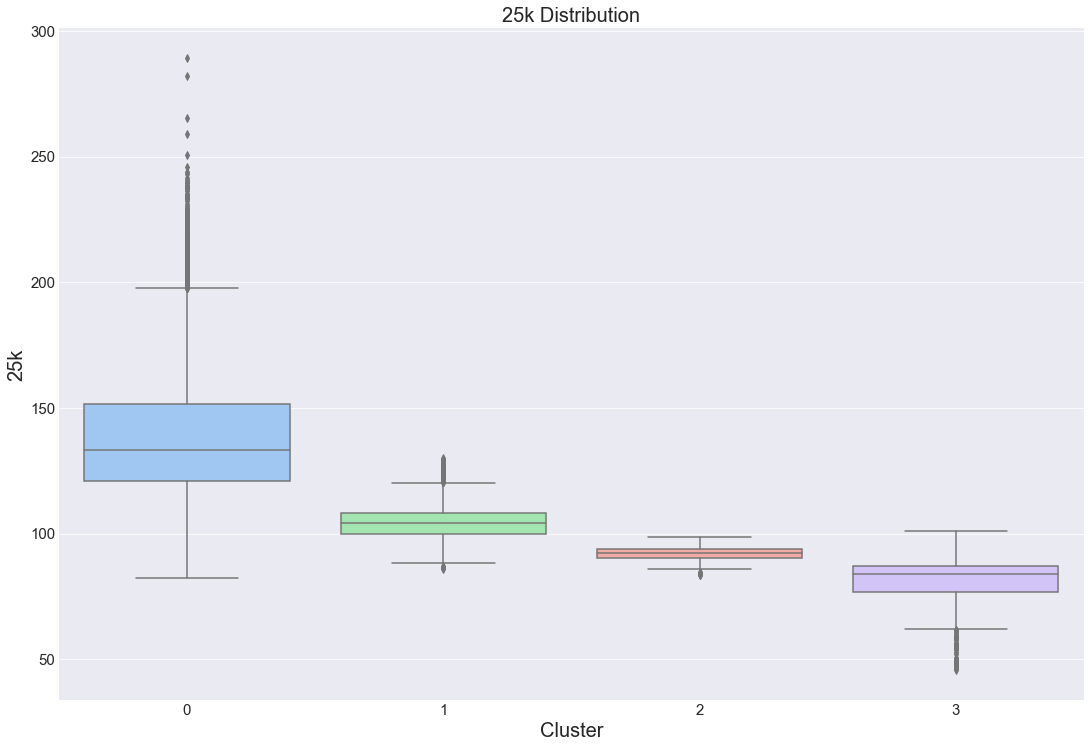

count    31649.000000
mean       133.581175
std         25.571480
min         45.800000
25%        115.430000
50%        128.850000
75%        147.700000
max        289.020000
Name: 25k, dtype: float64




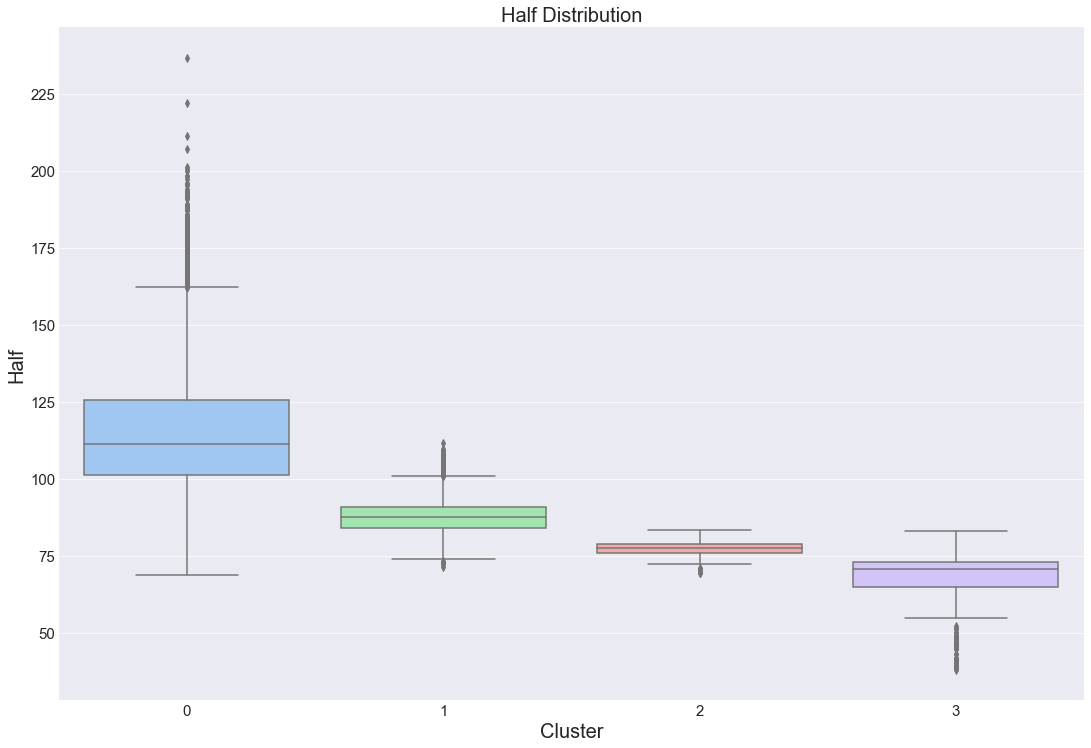

count    31649.000000
mean       111.211481
std         20.306387
min         38.030000
25%         96.750000
50%        107.680000
75%        122.680000
max        236.670000
Name: half, dtype: float64




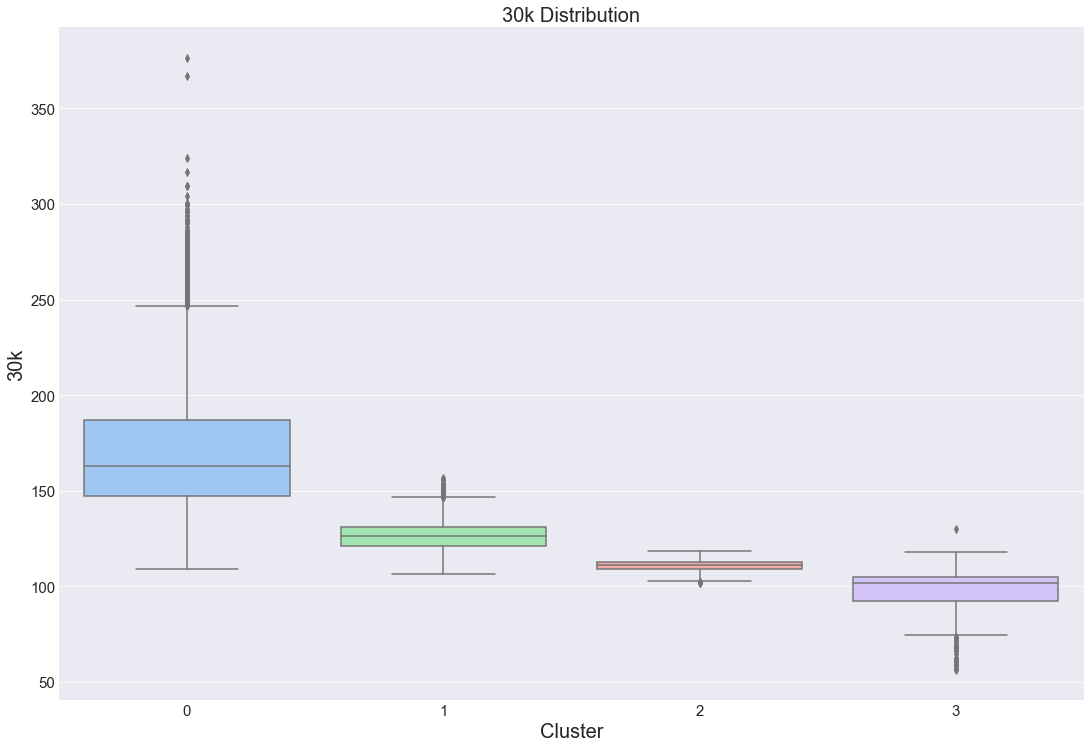

count    31649.000000
mean       163.894883
std         32.889354
min         56.450000
25%        140.520000
50%        157.500000
75%        182.200000
max        376.380000
Name: 30k, dtype: float64




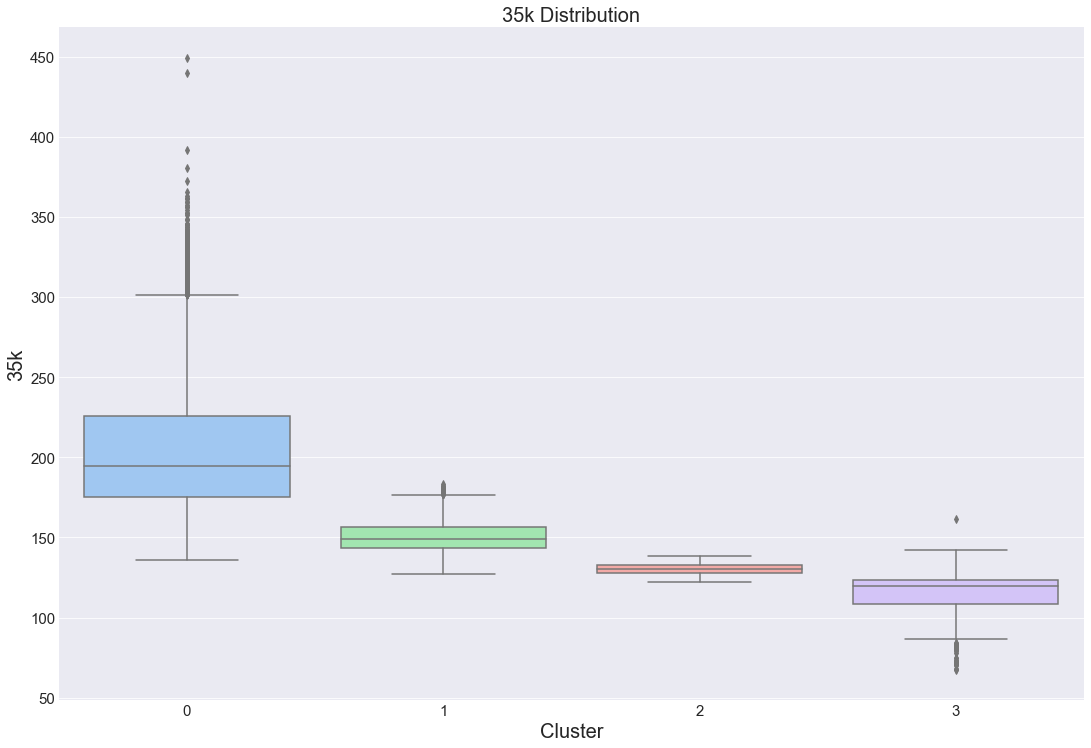

count    31649.000000
mean       196.033373
std         40.775036
min         67.420000
25%        166.950000
50%        187.850000
75%        219.370000
max        449.330000
Name: 35k, dtype: float64




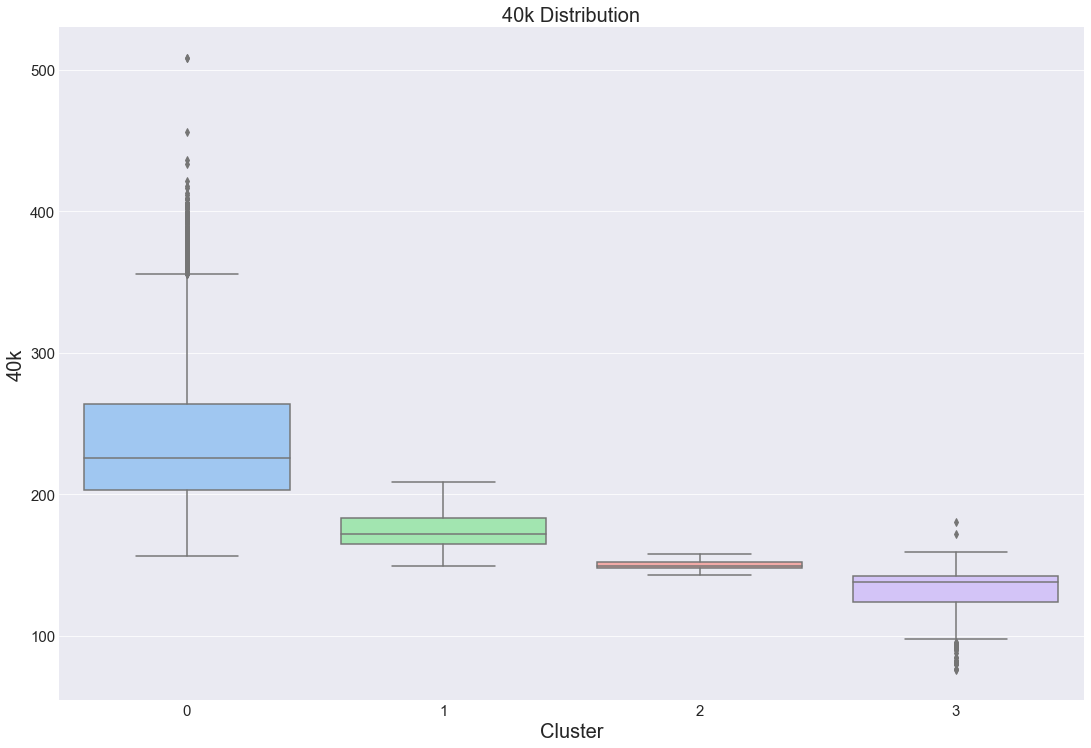

count    31649.000000
mean       228.189990
std         48.074493
min         76.100000
25%        193.620000
50%        218.470000
75%        256.570000
max        508.350000
Name: 40k, dtype: float64




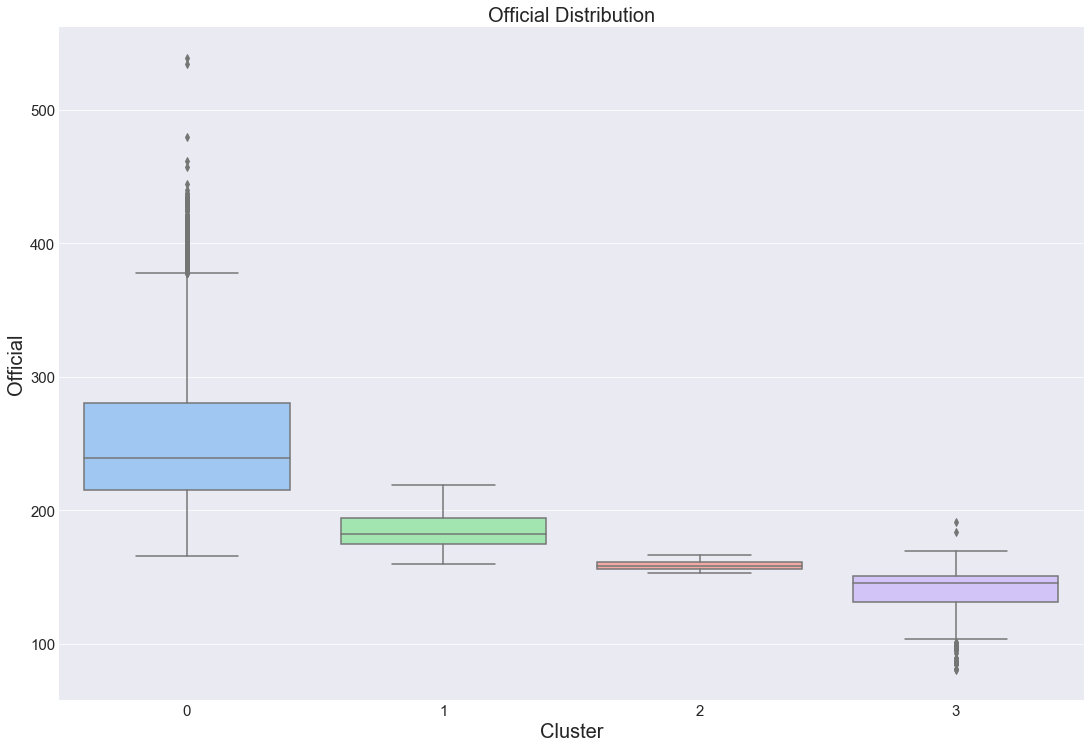

count    31649.000000
mean       241.952383
std         50.842552
min         80.600000
25%        205.300000
50%        231.980000
75%        272.200000
max        538.880000
Name: official, dtype: float64




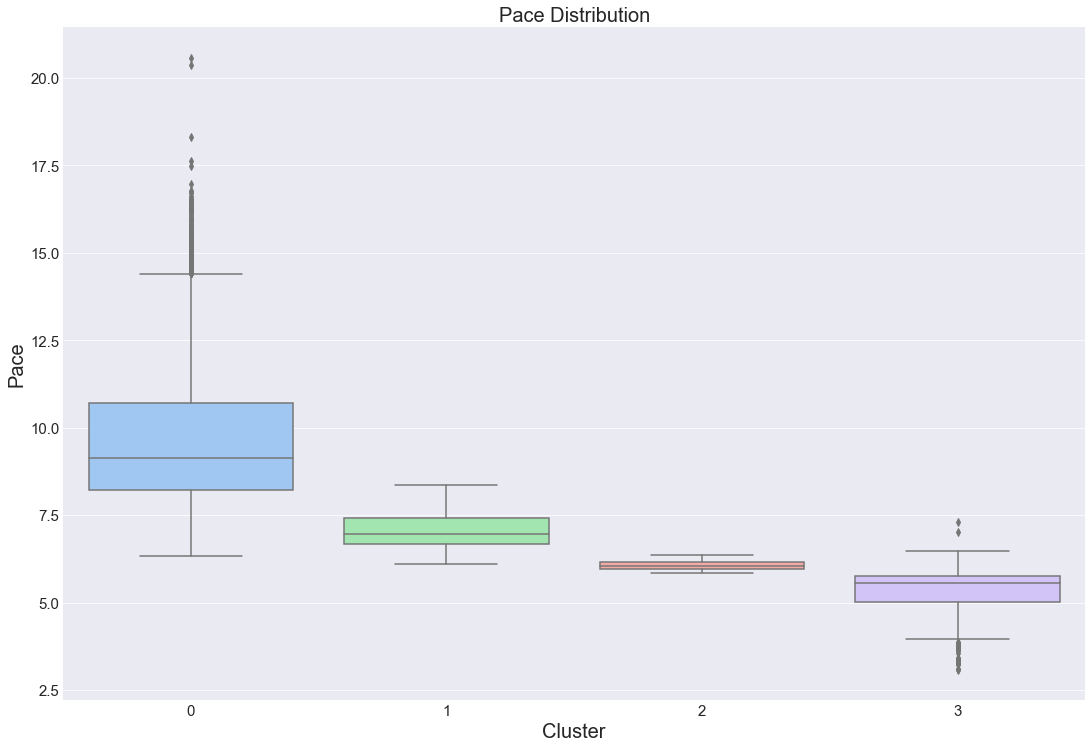

count    31649.000000
mean         9.236463
std          1.939150
min          3.080000
25%          7.830000
50%          8.850000
75%         10.380000
max         20.570000
Name: pace, dtype: float64




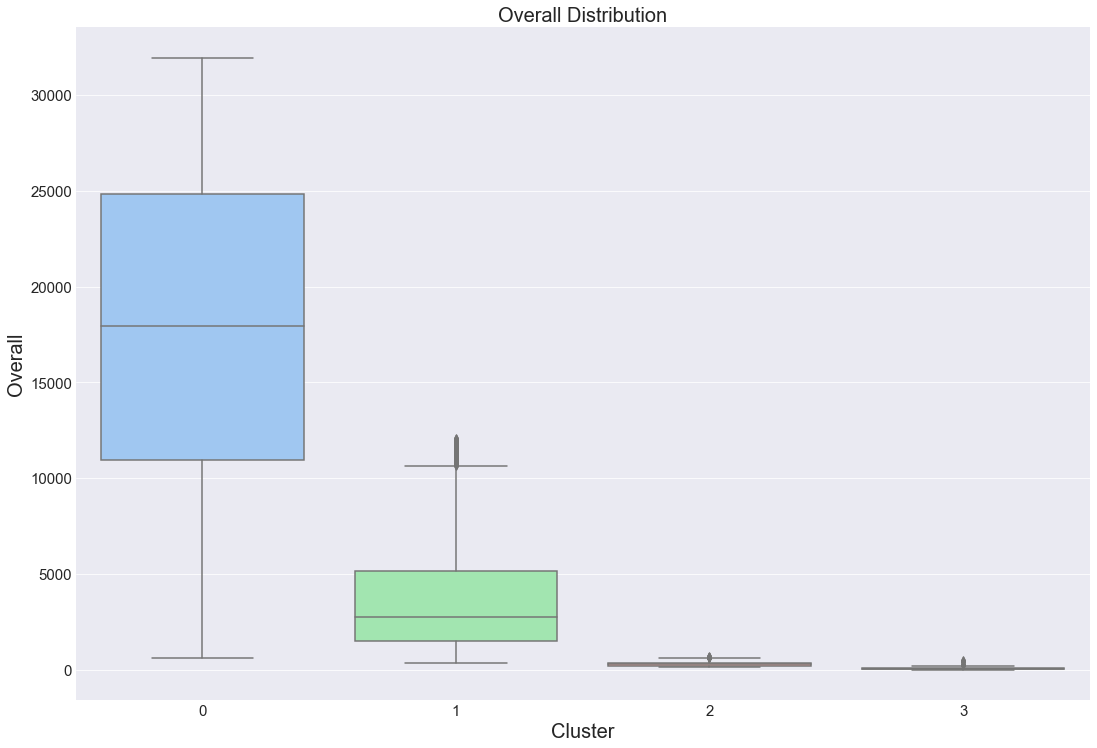

count    31649.000000
mean     15833.958924
std       9182.223743
min          1.000000
25%       7880.000000
50%      15829.000000
75%      23785.000000
max      31931.000000
Name: overall, dtype: float64




In [26]:
#Boxplots for each continuous feature and cluster

for col in boston[['age','5k', '10k', '20k', '25k', 'half', '30k', '35k', '40k', 'official', 'pace', 'overall']]:
    sns.set_style("darkgrid")
    sns.factorplot(kind='box', y=col, x='mean_shift_labels', data=boston, size=10, aspect=1.5, palette='pastel')
    plt.xlabel('Cluster', fontsize=20)
    plt.ylabel(col.capitalize(), fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(col.capitalize() + ' Distribution', fontsize=20)
    plt.show()
    print(boston[col].describe())
    print('\n')

# What Do Our Clusters Tell Us About the Boston Marathon Data?

Our K Means cluster essentially clustered the data by slow, medium and faster runners. The Means Shift method created 4 clusters from our data and segmented the faster runners into more than one cluster. 